In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-cmaps/CMaps/RUL_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/Damage Propagation Modeling.pdf
/kaggle/input/nasa-cmaps/CMaps/readme.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/x.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD001.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD001.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD001.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/RUL_FD002.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/test_FD003.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/Damage Propagation Modeling.pdf
/kaggle/input/nasa-cmaps/cmaps/CMaps/readme.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/train_FD003.txt
/kaggle/input/nasa-cmaps/cmaps/CM

In [2]:
!git clone https://github.com/lucas-fpaiva/estatistica_pes.git

Cloning into 'estatistica_pes'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 73 (delta 28), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), 663.43 KiB | 2.21 MiB/s, done.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pylab 
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import skew

In [4]:
colors = [(0.3764705882352941, 0.3764705882352941, 0.3764705882352941, 1),
                 (0, 0, 0.6470588235294118, 1),
                 (0, 0.6666666666666666, 0.6274509803921569, 1),
                 (0, 0.9764705882352941, 0, 1),
                 (0.8431372549019608, 0, 0, 1),
                 (1.0, 0.807843137254902, 0.0392156862745098, 1),
                 (0.1, 0.1, 0.1, 1)]

In [5]:
def plot_hist(data, cols, color_hist, max_hist=[30,30]):
    fig, axes = plt.subplots(1, 2,figsize=(6*len(cols),5))
    
    n=0
    for col in cols:
    
        sns.histplot(data, x=col,color=color_hist[n],ax=axes[n])
        axes[n].vlines(data.mode()[col], 0,max(max_hist), colors=colors[6], linewidth=.5)
        axes[n].vlines(data.median()[col], 0, max(max_hist), colors=colors[4],linestyles='dashed', linewidth=5)
        axes[n].vlines(data.mean()[col], 0, max(max_hist), colors=colors[3],linestyles='dashed', linewidth=5)#  'dashed', 'dashdot', 'dotted'

        axes[n].set_xlabel(col,fontsize=14)
        axes[n].set_title(col,fontsize=16)
        if n==0:
            axes[n].set_ylabel('Quantidade',fontsize=14)
            axes[n].legend(['Moda',"Mediana","Media"],fontsize=14)

        else: 
            axes[n].set_ylabel(' ',fontsize=1)

        axes[n].set_ylim(0,max(max_hist))
        
        n=n+1

def plot_box(data, cols, color_hist, lim=[30,30],color = colors[1]):
    fig, axes = plt.subplots(1, 3,figsize=(16,5))
    
    n=0
    for col in cols:
    
        sns.boxplot(y=col, data=data, ax=axes[n],color = color_hist[n])
        
        axes[n].set_ylim(lim[0],lim[1])
        axes[n].set_xlabel(col,fontsize=14)
        if n==0:
            axes[n].set_ylabel('Quantidade',fontsize=14)

        else: 
            axes[n].set_ylabel(' ',fontsize=1)
        n=n+1
   
    sns.histplot(data, x=cols[0],color=color_hist[0],ax=axes[2], bins=20,kde=True)
    sns.histplot(data, x=cols[1],color=color_hist[1],ax=axes[2], bins=20,kde=True)
    axes[2].set_ylabel('Quantidade',fontsize=14)    # ax.set_xlim(0.01, 0.08)
    axes[2].legend(cols,fontsize=14)


In [6]:
def normal_test(data,col):
    _, p1 = stats.normaltest(data[col].values[1:])
    p2=stats.shapiro(data[col])[1]
    p3 =  stats.kstest(data[col], 'norm')[1]
    texto = f'normaltest -> p={p1:.3e}' + f'\nshapiro -> p={p2:.3e}'+ f'\nkstest -> p={p3:.3e}'
    
    return texto

def normal_plot(data, cols,lim):
    fig, axes = plt.subplots(1,2,figsize=(12,5))
    n=0
    for col in cols:
        stats.probplot(data[col], dist="norm", plot= axes[n]);
        axes[n].set_title(col,fontsize=16)
        axes[n].text(-2.5,lim[1]-0.25*lim[1],normal_test(data,col),fontsize=14)
        axes[n].set_ylim(lim[0],lim[1])
        if n==0:
            axes[n].set_ylabel('Amostra',fontsize=14)
        else: axes[n].set_ylabel(' ',fontsize=1)
#         axes[n].set_ylabel('Amostra',fontsize=14)
        axes[n].set_xlabel('Teórico',fontsize=14)
        n=n+1


In [7]:
data = pd.read_csv('./estatistica_pes/output_2.csv',index_col=None)

In [8]:
data.head()

,Unnamed: 0,Time_LSTM,Erro_LSTM,Time_MLP,Erro_MLP
0,0,0.039491,9.034615,0.034667,5.229546
1,1,0.038221,15.535492,0.031945,30.973679
2,2,0.038269,23.968708,0.032428,48.150089
3,3,0.038073,12.212555,0.033106,43.684631
4,4,0.040365,19.605598,0.031586,36.840889


## Comparando o desempenho dos modelos LSTM e MLP

1. Análise de normalidade
2. Teste de comparação

### 1. Normalidade 

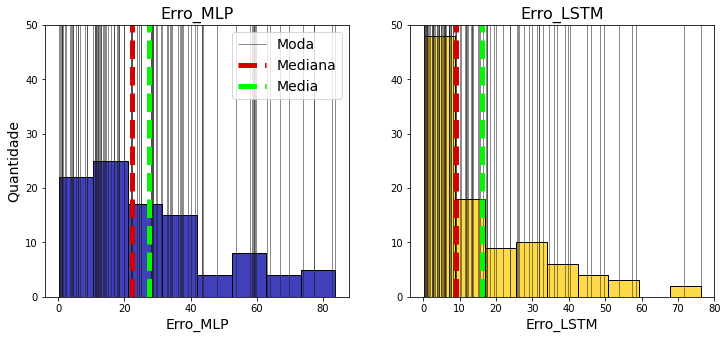

In [9]:
plot_hist(data, cols=['Erro_MLP', 'Erro_LSTM'],color_hist=[colors[1],colors[-2]],max_hist=[50,27])

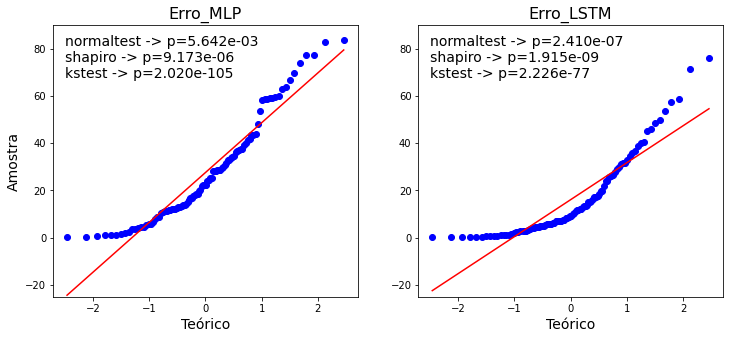

In [10]:
normal_plot(data,cols=['Erro_MLP', 'Erro_LSTM'],lim=[-25,90])

### 2. Comparação do erro

In [11]:
data[['Erro_MLP', 'Erro_LSTM']].mean()

Erro_MLP     27.553238
Erro_LSTM    16.089933
dtype: float64

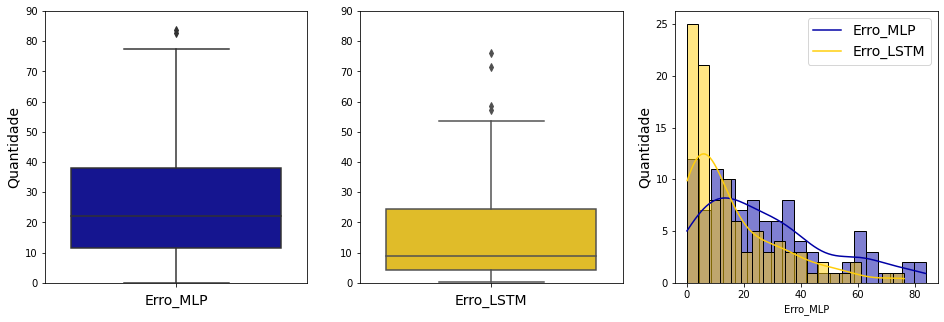

In [12]:
plot_box(data, cols=['Erro_MLP', 'Erro_LSTM'],color_hist=[colors[1],colors[-2]],lim=[0,90])

In [13]:
s, p = stats.wilcoxon(data['Erro_MLP'].values,data['Erro_LSTM'].values)
print("p_value:",p)
# para amostras pareadas 

p_value: 1.2815360586603802e-05


## Comparação de desempenho

### Verificação de normalidade

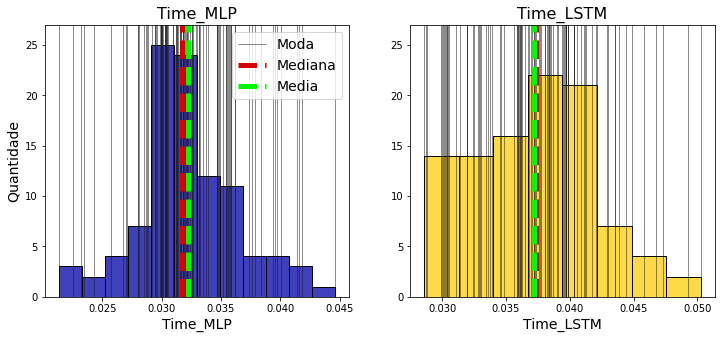

In [14]:
plot_hist(data[:], cols=['Time_MLP','Time_LSTM'],color_hist=[colors[1],colors[-2]],max_hist=[10,27])

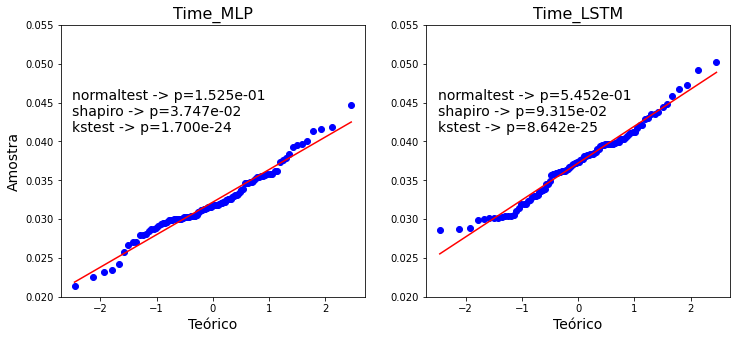

In [15]:
normal_plot(data,cols=['Time_MLP', 'Time_LSTM'],lim=[0.02,0.055])

### Comparação

In [16]:
data[['Time_MLP', 'Time_LSTM']].mean()

Time_MLP     0.032199
Time_LSTM    0.037215
dtype: float64

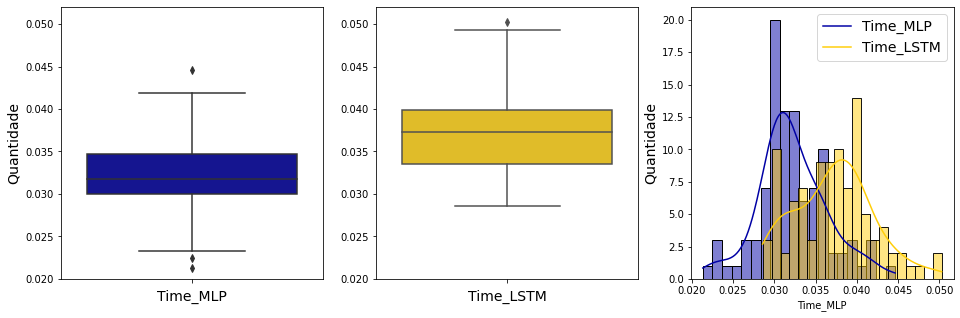

In [17]:
plot_box(data, cols=['Time_MLP', 'Time_LSTM'],color_hist=[colors[1],colors[-2]],lim=[0.02,0.052])

In [18]:
s, p =  stats.ttest_rel(data['Time_LSTM'].values,data['Time_MLP'].values,alternative="greater")
print("parametric p_value:",p)

s, p = stats.wilcoxon(data['Time_MLP'].values,data['Time_LSTM'].values)
print("non-parametric p_value:",p)

# para amostras pareadas 

parametric p_value: 6.398540746667426e-12
non-parametric p_value: 5.428925847467807e-10
